In [1]:
import mysql.connector
from mysql.connector import errorcode
import pandas as pd
import matplotlib.pyplot as plt


def connectionCreator():
    try:
        cnx = mysql.connector.connect(user="root", password="betocherabtidare", database="smoking")
        print("Connection established with the database")
        return cnx
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Something is wrong with your user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist")
        else:
            print(err)
        return None
    else:
        cnx.close()
        return None
    
mydb = connectionCreator()

Connection established with the database


  iso_code  avg_affo
0      QAT  0.468333
1      MCO  0.490000
2      LUX  0.533333
3      PRY  0.633333
4      GNQ  0.763333


/var/folders/q1/wg62sx317nsd7ftzfnx6xhqc0000gn/T/ipykernel_14462/871664813.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mydb)


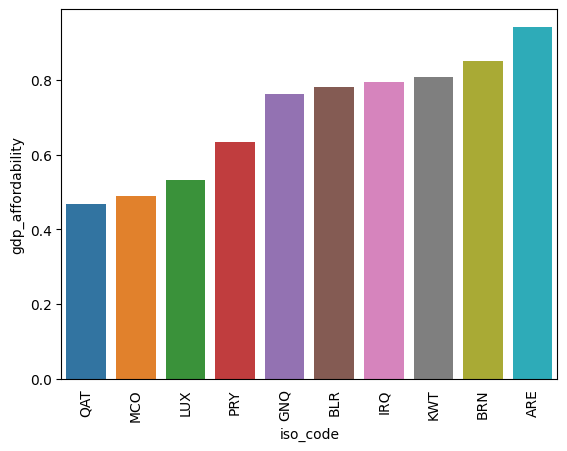

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

query = ''' 
SELECT iso_code, AVG(gdp_affordability) AS avg_affo
FROM affordability
GROUP BY iso_code
HAVING AVG(gdp_affordability) < (SELECT AVG(gdp_affordability) FROM 
affordability)
ORDER BY avg_affo ASC
LIMIT 10;
'''

df = pd.read_sql(query, mydb)

# Convert 'iso_code' to string data type
df['iso_code'] = df['iso_code'].astype(str)

print(df.head())
sns.barplot(x='iso_code', y='avg_affo',  data=df)
plt.xlabel('iso_code')
plt.xticks(rotation=90)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)  # labels along the bottom edge are off
plt.ylabel('gdp_affordability')
plt.show()

0       9.083333
1      14.527333
2      30.702667
3      30.094667
4      20.254333
         ...    
181    21.472667
182    23.386333
183    23.794000
184    12.101000
185    18.264000
Name: avg_tobacco_deaths, Length: 186, dtype: float64
0       4.903030
1      21.942424
2      17.642424
3      19.084848
4      15.612121
         ...    
181    21.424242
182    27.890909
183    16.275758
184     7.093939
185    22.642424
Name: avg_consumption, Length: 186, dtype: float64


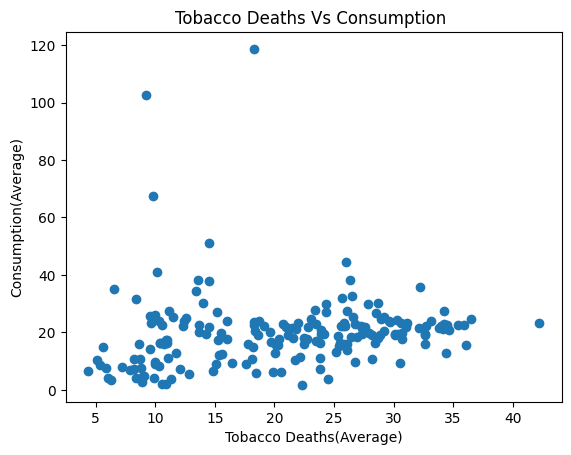

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cursor object
cursor = mydb.cursor()

# Retrieve data from the first table 'consumption_per_smoker_perday'
query1 = "SELECT * FROM avg_tobacco_usage_sumcount"
cursor.execute(query1)
consumption_data = cursor.fetchall()

# Retrieve data from the second table
query2 = '''SELECT iso_code, SUM(consumption_per_smoker_daily)/count(consumption_per_smoker_daily) as avg_consumption
from cig_consumption_per_smoker_daily
group by iso_code'''
cursor.execute(query2)
death_rate_data = cursor.fetchall()



# Create DataFrames from the tables
df_consumption = pd.DataFrame(consumption_data, columns=['iso_code',  'avg_tobacco_deaths'])
df_death_rate = pd.DataFrame(death_rate_data, columns=['iso_code',  'avg_consumption'])

# Merge the two DataFrames based on the common columns
merged_df = pd.merge(df_consumption, df_death_rate, on=['iso_code'])


# Extract relevant columns for scatter plot
x = merged_df['avg_tobacco_deaths']
y = merged_df['avg_consumption']

# Create scatter plot
print(x)
print(y)
plt.scatter(x, y)
plt.xlabel('Tobacco Deaths(Average)')
plt.ylabel('Consumption(Average)')
plt.title('Tobacco Deaths Vs Consumption ')
plt.show()
cursor.close()
mydb.close()

Connection established with the database
  iso_code     avg_con
0      SUR  118.681818
1      VCT  102.481817
2      ATG   67.642424
3      SAU   51.090909
4      BRN   44.366667


/var/folders/q1/wg62sx317nsd7ftzfnx6xhqc0000gn/T/ipykernel_14462/1454479526.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,mydb)


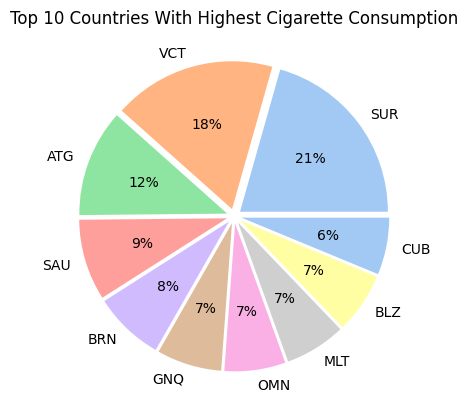

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mydb = connectionCreator()

# print()
# input_continent = input("Please enter the continent you want to create a chart for: ")
query = ''' 
SELECT iso_code, AVG(consumption_per_smoker_daily) AS avg_con
FROM cig_consumption_per_smoker_daily
GROUP BY iso_code
HAVING AVG(consumption_per_smoker_daily) > (SELECT AVG(consumption_per_smoker_daily) FROM 
cig_consumption_per_smoker_daily)
ORDER BY avg_con DESC
LIMIT 10;
'''

df = pd.read_sql(query,mydb)

print(df.head())

labels = df["iso_code"]
data = df["avg_con"]
# Plot a pie chart of the cases data for each continent
colors = sns.color_palette('pastel')[0:9]
plt.pie(x=data, labels=labels, colors = colors, autopct='%.0f%%',explode=[0.05]*len(data))
plt.title('Top 10 Countries With Highest Cigarette Consumption')
plt.show()

/var/folders/q1/wg62sx317nsd7ftzfnx6xhqc0000gn/T/ipykernel_14462/1296028011.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_average = pd.read_sql_query(query_average, mydb)
/var/folders/q1/wg62sx317nsd7ftzfnx6xhqc0000gn/T/ipykernel_14462/1296028011.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(query1, mydb)
/var/folders/q1/wg62sx317nsd7ftzfnx6xhqc0000gn/T/ipykernel_14462/1296028011.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(query2, mydb)
/var/folders/q1/

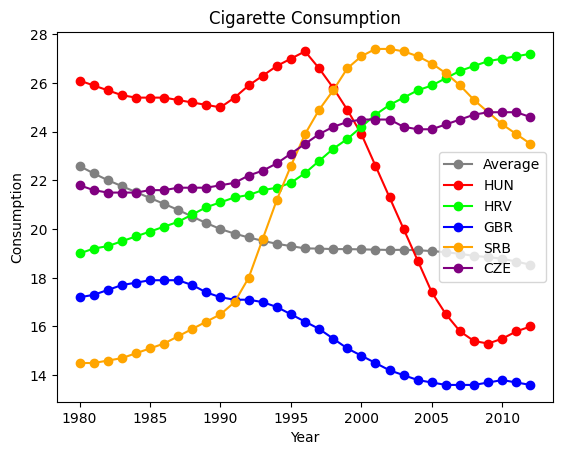

In [6]:
query_average = "SELECT data_year, AVG(consumption_per_smoker_daily) AS average_consumption FROM cig_consumption_per_smoker_daily GROUP BY data_year"
query1 = "SELECT data_year, consumption_per_smoker_daily from cig_consumption_per_smoker_daily WHERE iso_code='HUN'"
query2 = "SELECT data_year, consumption_per_smoker_daily from cig_consumption_per_smoker_daily WHERE iso_code='HRV'"
query3 = "SELECT data_year, consumption_per_smoker_daily from cig_consumption_per_smoker_daily WHERE iso_code='GBR'"
query4 = "SELECT data_year, consumption_per_smoker_daily from cig_consumption_per_smoker_daily WHERE iso_code='SRB'"
query5 = "SELECT data_year, consumption_per_smoker_daily from cig_consumption_per_smoker_daily WHERE iso_code='CZE'"

df_average = pd.read_sql_query(query_average, mydb)
df1 = pd.read_sql_query(query1, mydb)
df2 = pd.read_sql_query(query2, mydb)
df3 = pd.read_sql_query(query3, mydb)
df4 = pd.read_sql_query(query4, mydb)
df5 = pd.read_sql_query(query5, mydb)
mydb.close()

plt.plot(df_average['data_year'], df_average['average_consumption'], marker='o',color='gray', label='Average')
plt.plot(df1['data_year'], df1['consumption_per_smoker_daily'], marker='o',color='#FF0000', label='HUN')
plt.plot(df2['data_year'], df2['consumption_per_smoker_daily'], marker='o',color='#00FF00', label='HRV')
plt.plot(df3['data_year'], df3['consumption_per_smoker_daily'], marker='o',color='#0000FF', label='GBR')
plt.plot(df4['data_year'], df4['consumption_per_smoker_daily'], marker='o',color='#FFA500', label='SRB')
plt.plot(df5['data_year'], df5['consumption_per_smoker_daily'], marker='o',color='#800080', label='CZE')

plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Cigarette Consumption')
plt.legend()


plt.show()